In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import argparse
import os
import time
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import make_grid
from torch.utils.data import Dataset

# [1. 저장한 피클 파일 부러오기]

In [ ]:
train_file_path = '/content/drive/MyDrive/archive/train_data_list.pkl'
test_file_path = '/content/drive/MyDrive/archive/test_data_list.pkl'

# 피클 파일 불러오기
with open(train_file_path, 'rb') as file:
    train_dataset = pickle.load(file)
with open(test_file_path, 'rb') as file:
    test_dataset = pickle.load(file)

## [1.1. 정상적으로 Loader 작동하는지 확인]

In [ ]:
transform = transforms.Compose([
                                transforms.RandomCrop((227, 227)), # 227 * 227
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size=16

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
for x, y in train_loader:
  print(transform(x))
  break

tensor([[[[ 0.2863, -0.1059, -0.1765,  ...,  0.4745,  0.4745,  0.4745],
          [ 0.3255, -0.0824, -0.1608,  ...,  0.4745,  0.4745,  0.4745],
          [ 0.4039, -0.0275, -0.1451,  ...,  0.4745,  0.4745,  0.4745],
          ...,
          [-0.4039, -0.4118, -0.4039,  ...,  0.2471,  0.2392,  0.2549],
          [-0.4039, -0.4118, -0.4039,  ...,  0.2549,  0.2627,  0.2784],
          [-0.3961, -0.4039, -0.4118,  ...,  0.2627,  0.2706,  0.2863]],

         [[ 0.2863, -0.1137, -0.1765,  ...,  0.4431,  0.4431,  0.4431],
          [ 0.3255, -0.0902, -0.1765,  ...,  0.4431,  0.4431,  0.4431],
          [ 0.3804, -0.0588, -0.1765,  ...,  0.4431,  0.4431,  0.4431],
          ...,
          [-0.4196, -0.4275, -0.4196,  ...,  0.2157,  0.2078,  0.2235],
          [-0.4196, -0.4275, -0.4196,  ...,  0.2235,  0.2314,  0.2471],
          [-0.4118, -0.4196, -0.4275,  ...,  0.2314,  0.2392,  0.2549]],

         [[ 0.2000, -0.1686, -0.2392,  ...,  0.3725,  0.3725,  0.3725],
          [ 0.2471, -0.1529, -

##[1.2. PIL 이미지 출력 확인]

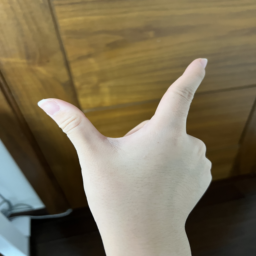

In [ ]:
# 불러온 데이터 확인
numpy_image = (train_dataset[0][0].permute(1, 2, 0).numpy() * 255).astype('uint8')

# 넘파이 배열을 PIL Image로 변환
pil_image = Image.fromarray(numpy_image)

# 이미지 출력
pil_image

##[1.3. cv2 이미지 출력 확인]

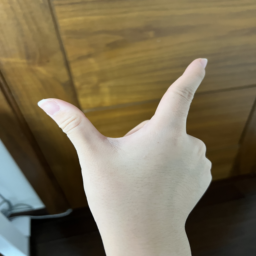

In [ ]:
from google.colab.patches import cv2_imshow
cv_image = cv.cvtColor(np.array(pil_image), cv.COLOR_RGB2BGR)
cv2_imshow(cv_image)

# [2. Contour 추가]

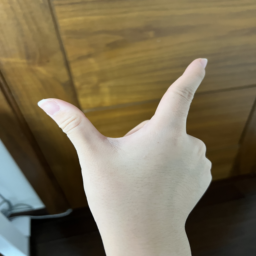

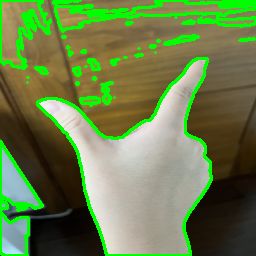

In [ ]:
import cv2
import numpy as np

# 이미지 파일 읽기
image = cv.cvtColor(np.array(pil_image), cv.COLOR_RGB2BGR)

# 그레이스케일 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 이진화
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Contour 추출
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Contour를 그리기 위한 복사본 만들기
contour_image = image.copy()

# Contour 그리기
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# 결과 출력
cv2_imshow(image)
cv2_imshow(contour_image)

## [2.1. 가장 큰 영역의 Contour 츌력]

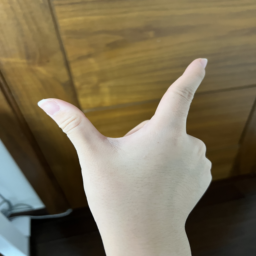

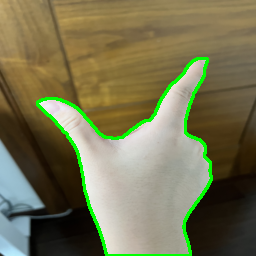

In [ ]:
import cv2
import numpy as np

# 이미지 파일 읽기
image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

# 그레이스케일 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 이진화
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Contour 추출
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 가장 큰 영역의 contour 찾기
largest_contour = max(contours, key=cv2.contourArea)

# Contour를 그리기 위한 복사본 만들기
contour_image = image.copy()

# 가장 큰 영역의 contour 그리기
cv2.drawContours(contour_image, [largest_contour], -1, (0, 255, 0), 2)

# 결과 출력
cv2_imshow(image)
cv2_imshow(contour_image)
